In [1]:
import numpy as np # library for data structures, vectors, matrices and mathematical functions
import matplotlib.pyplot as plt                   # library for plotting and visual representation
import matplotlib.transforms as transform                   # library for plotting and visual representation
from matplotlib import rcParams                   # module handling generic plot parameters
from matplotlib.ticker import (FormatStrFormatter)# module for figure axis formatting
import pandas as pd                               # data administration, here used for data import
from scipy.optimize import curve_fit              # fitting algorithm from the scipy package
from IPython.display import display as dy, Markdown as md, Latex as Lx, Image as Im, HTML as hm # displaying LaTeX code in code cells
import sympy as sp
import os
import tabulate
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 15,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',
                     'figure.figsize': (10,6),
                    })

plt.rcParams['axes.facecolor'] = 'black' 
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['xtick.labelcolor'] = 'white'
plt.rcParams['ytick.labelcolor'] = 'white'
plt.rcParams['legend.labelcolor'] = 'white'
plt.rcParams['grid.color'] = '#707070'
plt.rcParams['axes.titlepad'] = 20
legendfontsize=12

ip = get_ipython()
ibe = ip.configurables[-1]
ibe.figure_formats = { 'pdf', 'png'}

# E11e Phase Shift in AC Circuits

Group #13

NG Kuok Fung | #3797903 

Edgar Harutyunyan | #3775171

**Overview of Tasks**

**1.**  Measure the phase shift $\phi$ between current and voltage as a function of frequency $f$ for

**1a.**  an RLC series circuit,

**1b.** an RC series circuit,

**1c.** an RL series circuit.

**2.** Analysis

**2a.** Plot the phase shifts of the three circuits in one graph.

**2b.** Determine the series resistance $R$ from the phase shift of the RC-series circuit.

**2c.** Determine the inductance $L$ of the coil

**i.** from the resonance frequency $f_0$ of the RLC series circuit

**ii.** by fitting of the phase shift of the RL series circuit.

**2d.** Fit the phase shift $\phi$ of the RLC series circuit treating the resistance $R$ as a fitting parameter.

In [2]:
# GLOBALS
#task_1_title_str = ['0', '30', '45'] # Degrees
#phi_l = [0, -np.pi/6, np.pi/4]
data_dir = './data/'

def fit_and_plot(df, x_col, y_col, xlabel, ylabel, title, fit_func=None, legend_labels=None):
    # Plot the scatter data
    plt.scatter(df[x_col], df[y_col], color='#ADD8E6', marker='x', label='Data')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    
    if fit_func is not None:
        # Perform non-linear regression using curve_fit
        x = df[x_col].values
        y = df[y_col].values
        params, cov_mat = curve_fit(fit_func, x, y)
        
        # Plot the fitted curve
        x_fit = np.linspace(min(x), max(x), 100)
        y_fit = fit_func(x_fit, *params)
        plt.plot(x_fit, y_fit, color='red', label='Fitted Curve')
    
    # Customize the legend if labels are provided
    if legend_labels is not None:
        plt.legend(legend_labels)
    else:
        plt.legend()
    
    plt.show()
    
    if fit_func is not None:
        return [params, cov_mat]
    else:
        return None
    
  

## Task 1:  Measurement of phase shift $\phi$

***Task Definition*** 

Measure the phase shift $\phi$ between current and voltage as a function of frequency $f$ for an RLC, RL and RC series circuit.

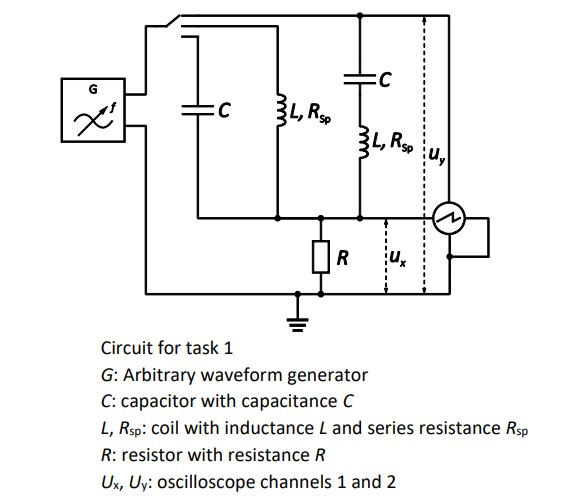

<IPython.core.display.Latex object>

In [3]:
dy(Im("./img/CD.jpg", height=100, width=500))
dy(Lx(r'$Figure\, 1.1$: Series RLC,RL and RC Circuit Diagram'))

***Procedure***

1. The RLC, RL and Rc Series Circuits were setup according to the circuit diagram in **Fig 1.1**.
<br>

2. 
<br>

3. 
<br>

4.  


## Task 2: Analysis

### Task 2a: Plot the phase shifts of the three circuits in one graph.


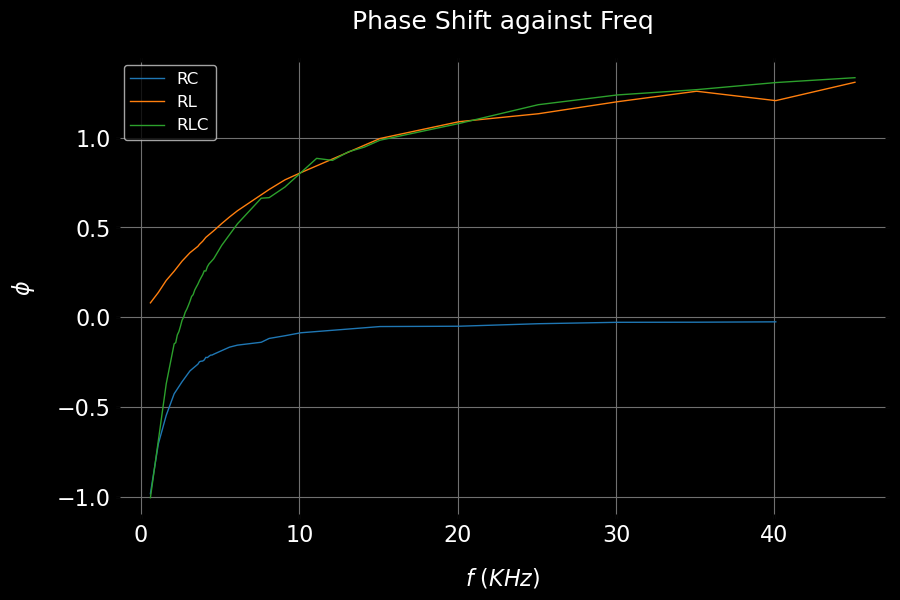

<IPython.core.display.Latex object>

In [5]:
series_path = data_dir 
df_l = []
R_d_l = []
phi_l = []
f_l = []

for path in os.listdir(series_path):
    file_path = os.path.join(series_path,path)
    if os.path.isfile(file_path): 
        all_sheets = pd.read_excel(file_path, sheet_name=None)
        for sheet_name, df in all_sheets.items():
            df = df.dropna()
            # Optionally filter out rows where a specific column value is less than 2001
            # df.drop(df[df.iloc[:,1] < 2001].index, inplace=True)
            df.sort_values(by=df.columns[2])
            f_l.append(np.array(df.iloc[:, 2]))
            phi_l.append(np.array(df.iloc[:, 4]))
            df_l.append(df)
            R_d_l.append(sheet_name)

sorted_lists = sorted(zip(R_d_l, f_l, phi_l, df_l), key=lambda x: x[0])
R_d_l, f_l, phi_l, df_l = zip(*sorted_lists)

if f_l and phi_l and R_d_l:
    for f, phi, label in zip(f_l, phi_l, R_d_l[:]):  # Skip the first 3 elements of R_d_l (['RL', 'RC', 'RLC'])
        plt.plot(f, phi, label=label)
    

plt.xlabel(r'$f$ ($KHz$)')
plt.ylabel(r'$\phi$')
plt.title('Phase Shift against Freq')
plt.legend()
plt.grid(True)
plt.show()
dy(Lx(r'$Figure\, 1.1 $: Phase Shift Curve'))

### Task 2b:  RC-series circuit analysis

***Task Definition*** 

Determine the series resistance $R$ from the phase shift of the RC-series circuit.


***Theoretical Basis*** 

$$Z = R+ iX_T$$

$$Im(Z) = X_T~~~~,~~~~~ Re(Z) = R$$

$$X_T = X_L -X_C$$

$$X_L=\omega L = 2\pi f L$$

$$X_C=\frac{1}{\omega C}= \frac{1}{2\pi f C}$$

$$\tan{\phi} = \frac{Im(Z)}{Re(Z)} = \frac{\omega L - \frac{1}{\omega C}}{R} \label{eq2.1} \tag{2.1}$$

In [49]:
def phi(f, R, C, L):
    X_L = 2 * np.pi * f * L  # Inductive reactance
    X_C = 1 / (2 * np.pi * f * C)  # Capacitive reactance
    X_T = X_L - X_C
    return np.arctan(X_T / R)

R_fit_l = []
C_fit_l = []
L_fit_l = []

for i in range(len(f_l)):
    if i==1:
        x_data = f_l[i] #(KHZ -> Hz)
        y_data = phi_l[i]
    
        [R_fit, C_fit,L_fit], cov_mat = curve_fit(phi,x_data,y_data, 
                                                           p0=(10, 0.5e-6,0), method='lm')
                                                   #bounds=([1,R_d_l[i]-1,45e-9,1.4e-3],[25,R_d_l[i]+1,48e-9,1.6e-3]))
        R_fit_l.append(R_fit)
        C_fit_l.append(C_fit)
        L_fit_l.append(L_fit)
        
        #Test Space
        print(L_fit)                                 
        y_fit = phi(x_data, R_fit, C_fit, 0)

y_data = -0.0259454216110381, y_fit = -0.023544273976180943
-0.19313992467873264
y_data = -0.02800113407364813, y_fit = -0.026897531012982482
y_data = -0.02854888206253506, y_fit = -0.03136421842174909


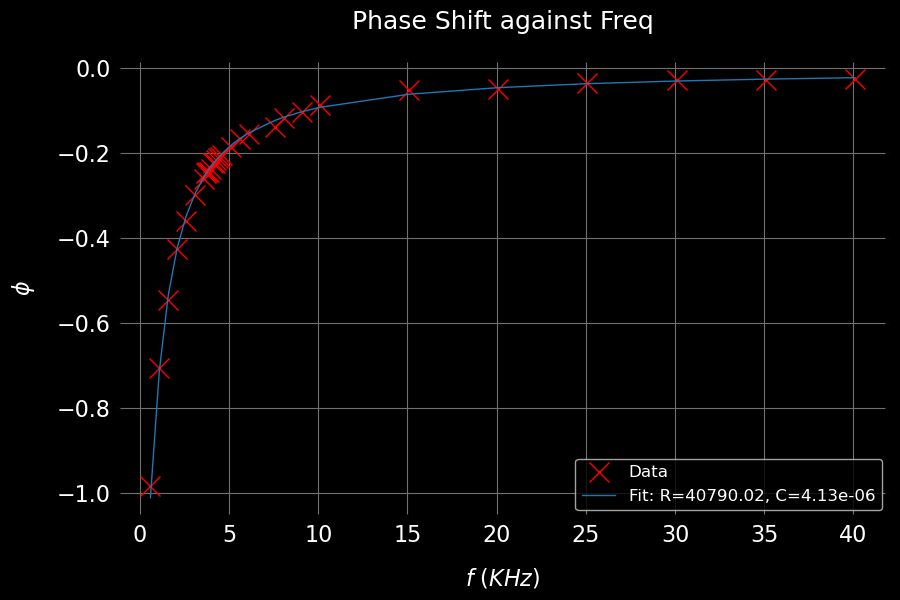

<IPython.core.display.Latex object>

In [56]:
plt.plot(x_data, y_data, 'rx', label='Data')  # Plot the data points    
plt.plot(x_data, y_fit, '', label=f'Fit: R={R_fit:.2f}, C={C_fit:.2e}')  # Plot the fitted curve

plt.xlabel(r'$f$ ($KHz$)')
plt.ylabel(r'$\phi$')
plt.title('Phase Shift against Freq')
plt.legend()
plt.grid(True)
plt.show()
dy(Lx(r'$Figure\, 1.2 $: RC Fit'))

### Task 2c: Fitting

***Task Definition*** 

Fit an appropriate model function to the measured resonance curves and determine $f_0$ and $\delta$.

In [ ]:
def U_normalized(f, R_sp, R_d, C, L):
    #Constants and calculations based on your description
    X_L = 2 * np.pi * f * L  # Inductive reactance
    X_C = 1 / (2 * np.pi * f * C)  # Capacitive reactance
    X_T = X_L - X_C  # Total reactance
    R_T = R_sp + R_d # Total Resistance
    
    return R_T / np.sqrt(R_T**2 + X_T**2)

def tan_phi(f, R_d, R_sp, C, L):
    X_L = 2 * np.pi * f * L  # Inductive reactance
    X_C = 1 / (2 * np.pi * f * C)  # Capacitive reactance
    X_T = X_L - X_C
    return X_T / (R_d+R_sp)

def freq_Thomson(L_arg, C_arg):
    return np.sqrt(1/(L_arg*C_arg))/(2*np.pi)

In [ ]:
C_fit_l = []
L_fit_l = []
for i, df in enumerate(df_l):
    x_data = f_l[i]
    
    A = 1-np.abs(V_d_l[i]-V_G_l[i])/(np.abs(V_d_l[i]-V_G_l[i]).max())
    A = V_d_l[i]/(V_d_l[i]).max()
    A = A/A.max()
    
    #A = np.tan(np.deg2rad(phi_l[i]))
    #delta_th = (10+R_d_l[i])/(2*1.5e-3)
    #f_0_th = 1/(2*np.pi*(47e-9*1.5e-3))
    #[R_d_fit, R_sp_fit, C_fit, L_fit], cov_mat = curve_fit(tan_phi, x_data, A,
    #                                                       p0=(R_d_l[i],10, 47e-9, 1.5e-3), method='trf',
    #                                                      bounds=([R_d_l[i]-5,1,45e-9,1e-3],[R_d_l[i]+5,25,50e-9,2e-3]))
    #[R_sp_fit, R_d_fit, C_fit, L_fit], cov_mat = curve_fit(tan_phi,x_data,y_data, 
    #                                                       p0=(10, R_d_l[i], 47e-9, 1.5e-3), method='lm')
    [R_sp_fit, R_d_fit, C_fit, L_fit], cov_mat = curve_fit(U_normalized,x_data,A, 
                                                           p0=(10, R_d_l[i], 47e-9, 1.5e-3), method='trf',
                                                   bounds=([1,R_d_l[i]-1,45e-9,1.4e-3],[25,R_d_l[i]+1,48e-9,1.6e-3]))
    
    
    #[delta_fit, f_0_fit], cov_mat = curve_fit(U_normalized,x_data,A, 
    #                                                      p0=(delta_l[i], f_0_l[i]), method='trf',
    #                                                      bounds=([0, f_0_l[i]-1000],[2, f_0_l[i]+1000]))

    
    # Plot the original data points
    #plt.plot(x_data, y_data, label=f'Data')
    
    # Plot the fitted curve
    #x_fit = np.linspace(x_data.min(),x_data.max(),1000)
    y_fit = U_normalized(x_data,  R_sp_fit, R_d_fit, C_fit, L_fit)

    u_R_sp = np.sqrt(cov_mat[0][0])
    u_R_d = np.sqrt(cov_mat[1][1])
    u_C = np.sqrt(cov_mat[2][2])
    u_L = np.sqrt(cov_mat[3][3])  

    
    L_fit_l.append(L_fit)
    C_fit_l.append(C_fit)
    
    #u_delta = np.sqrt((1/(2*L_fit))**2*(u_R_sp**2 + u_R_d**2)+(delta/L_fit*u_L)**2)
    #y_fit = U_normalized(x_data,delta_fit, f_0_fit)
    #y_fit_th = tan_phi(x_fit,R_d_l[i], 18, 47e-9, 1.5e-3)
    #y_fit_th = U_normalized(x_fit,delta_th,f_0_th)
    plt.plot(x_data*1e-3, A, '-', label="Data")
    plt.plot(x_data*1e-3, y_fit, '-', label="Fit")
    #plt.plot(x_fit, y_fit_th, '-', label="theory")
    #f_0 = freq_Thomson(L_fit,C_fit)
    plt.axvline(f_0*1e-3, color='r', label=r'$f_0 = %.2f~kHz$'%(f_0*1e-3))
    plt.xlabel('Frequency (kHz)')
    plt.ylabel(r'$\frac{U_r}{U_{f_0}}$')
    plt.title(' Fitted Resonance Curve: $R_d = %s ~\Omega$' %(R_d_l[i]))
    plt.legend() 
    plt.grid(True)
    plt.show()
    dy(Lx(r'$Figure\, 2.%d $: Fitted Resonance Curve: $R_d = %s ~\Omega$' %(i+5, R_d_l[i])))
    
        
    dy(Lx(r'$$R_d = (%.f \pm %.1f) ~\Omega$$' %(R_d_fit, np.sqrt(cov_mat[1][1]))))
    dy(Lx(r'$$R_{sp} = (%.f \pm %.1f) ~\Omega$$' %(R_sp_fit, np.sqrt(cov_mat[0][0]))))
    dy(Lx(r'$$L = (%.2f \pm %.3f) ~mH$$' % (L_fit*1e3, np.sqrt(cov_mat[3][3])*1e3)))
    dy(Lx(r'$$C = (%.2f \pm %.3f) ~nF$$' % (C_fit*1e9, np.sqrt(cov_mat[2][2])*1e9)))
    dy(Lx(r'$$\delta = %.2f ~kHz$$' %(delta*1e-3)))
    dy(Lx(r'$$f_0 = %.2f ~kHz$$' % (f_0*1e-3)))


***Analysis*** 

1. It is observed that the values of $L$ and $C$ found via fitting closely matches the actual values used in the experiment which were $L= 1.5mH $ and $C= 47nF$ respectively.
<br>

2. Similarly, the values of $f_0$ found via fitting is close to the value of $f_0$ computed via the Thomson Equation.

### Task 2d: Thomson Equation

***Task Definition*** 

Calculate the capacitance $C$ of the capacitor using the Thomson equation.

***Theoretical Basis*** 

1. The average resonant frequency $f_{avg}$ is determined using the values of $f_0$ from the fittings in task 1c.
<br>

2. Additionally, the value of $L$ from fit was also averaged, and used to determine $C$ which closely matched the actual value of $C = 47nF$




In [ ]:
L = 1.5e-3 # H
f_0 = (np.array(f_0_l)*1e3).mean()
C = 1/((2*np.pi*f_0)**2*L)

dy(Lx("Capacitance from Thomson's equation:"))
dy(Lx(r'$$C = \frac{1}{(2\pi f_0)^2 L} = %.2f ~nF$$' % (C*1e9)))

## Task 3: Parallel resonant circuit

***Task Definition*** 

Measure the frequency-dependent current draw of a circuit in which the capacitor and coil are connected in parallel and in series with the resistor $R_d$.

In [ ]:
dy(Im("./img/PD.jpg", height=100, width=500))
dy(Lx(r'$Figure\, 3.1$: RLC Parallel Circuit Diagram'))

dy(Im("./img/P.jpg", height=100, width=500))
dy(Lx(r'$Figure\, 3.2$: Parallel RLC Setup'))

***Procedure***

1. A RLC Parallel Circuit **Fig 3.2** is setup using the circuit diagram in **Fig 3.1**.
<br>

2. Sine waves of varying freqeuncies between 1 to 50kHz are generated by the picoscope, and supplied into the circuit. 
<br>

3. The peak to peak voltage of the damping resistor is then measured via Channel A of the picoscope. Whereas, on Channel B the peak to peak voltage of the generator has been captured. The phase shift between Channel A and Channel B has been measured as well.
<br>

4. During data preprocessing, invalid values have been droped and the voltages have been normalized.
<br>

## Task 4: Evaluation of the parallel resonant circuit

### Task 4a

***Task Definition*** 

Derive an expression for the impedance of this circuit.

First consider the impedance of LC loop.

$$\frac{1}{Z_{||}} = \frac{1}{Z_C} + \frac{1}{Z_L}$$

where,

- $Z_L$ : impedance of the coil.
$$Z_L = R_{sp} + iX_L = R_{sp} + i\omega L$$
- $Z_C$ : impedance of the capacitor.
$$Z_C = iX_C = -i\frac{1}{\omega C}$$

Hence,

$$Z_{||} = \frac{1}{i\omega C + \frac{1}{R_{sp} + i\omega L}}$$

or in rectangular form:

$$Z_{||} = \frac{R_{sp}}{\alpha_\omega} + i \omega\frac{L-R^2_{sp}C - \omega^2L^2C}{\alpha_\omega}$$

where $\alpha_\omega := (\omega C R_{sp})^2 + (\omega^2LC - 1)^2$.

The total impedance of the circuit will be:

$$Z = R_d + Z_{||} = \left(R_d + \frac{R_{sp}}{\alpha_\omega}\right) + i \omega\frac{L-R^2_{sp}C - \omega^2L^2C}{\alpha_\omega} \label{eq4.1} \tag{4.1}$$

At resonance($\omega = \omega_0$), the impedance should be purely resistive, which means $Im(Z) = 0$.

$$L-R^2_{sp}C - \omega_0^2L^2C = 0$$

Thus, 

$$\omega_0 = \frac{1}{\sqrt{LC}}\sqrt{1 - \frac{R^2_{sp}C}{L}} \label{eq4.2} \tag{4.2}$$

Check that when one has an ideal inductance($R_{sp} = 0$), the resonant frequency recovers Thomson’s equation $\omega_0 = \frac{1}{\sqrt{LC}}$


Note:

$$\alpha_{\omega_0} = \frac{CR^2_{sp}}{L}$$

To validate the results above, one can evaluate the $Z$, when $\omega \rightarrow 0$ (AC $\rightarrow$ DC). In this case, imaginary part of the $Z$ becomes $0$, and with $\alpha_{\omega \rightarrow 0} = 1$ one ends up

$$Z_{\omega \rightarrow 0} = R_d + R_{sp}$$

as expected for two series resistance. 

The tangent of the phase shift $\phi$ between current and voltage is equal to the ratio of imaginary and real part of the impedance of a circuit.

$$\tan{\phi} = \frac{Im(Z)}{Re(Z)} = \frac{\omega(L-R^2_{sp}C - \omega^2L^2C)}{\alpha_\omega R_d + R_{sp}} \label{eq4.3} \tag{4.3}$$

### Task 4b

***Task Definition***

Fit this model curve to the measured data. Determine $L$, $C$, $R_{sp}$ and $R_d$ as well as the resonance frequency $f_0$.

In [ ]:
parallel_path = data_dir + "Parallel/"
df_l = []
R_d_l = []
phi_l = []
f_l = []
V_G_l =[]
V_d_l = []

for path in os.listdir(parallel_path):
    file_path = os.path.join(parallel_path,path)
    if os.path.isfile(file_path): 
        df = pd.read_csv(file_path).dropna()
        df.drop(df[df.iloc[:,1] < 1001].index, inplace=True)
        df.sort_values(by=df.columns[1])
        f_l.append(np.array(df.iloc[:,1]))
        V_d_l.append(np.array(df.iloc[:,2]))
        V_G_l.append(np.array(df.iloc[:,3]))
        phi_l.append(np.array(df.iloc[:,4]))
        df_l.append(df)
        R_d_l.append(int(path[:-7])) # take the name of the file

sorted_lists = sorted(zip(R_d_l, f_l, V_d_l, V_G_l, phi_l, df_l))
R_d_l, f_l, V_d_l, V_G_l, phi_l, df_l = zip(*sorted_lists)

To determine the resonant frequency $\frac{U}{U_0}$ vs $f$ graph is plotted. The resonant frequency $f_0$ corresponds to the minima of the curve.

In [ ]:
#def fit_func(freq, L_arg, C_arg, R_arg):
f_0_l = []
table_data = [[r'$~$',r'$R_d ~(\Omega)$', r'$f_0 ~(kHz)$']]
for i,df in enumerate(df_l):
    f = f_l[i] * 1e-3  # Hz -> KHz
    A = 1-np.abs(V_d_l[i]-V_G_l[i])/(np.abs(V_d_l[i]-V_G_l[i]).max())
    A = A/A.max()
    plt.plot(f, A, label=(r'$R_d = %d ~\Omega$' % R_d_l[i]))
    f_0 = f[A.argmin()]
    f_0_l.append(f_0)
    table_data.append([r'$%d$' % (i+1), r'$%d$' % R_d_l[i], r'$%.2f$' % f_0])
    #plt.scatter(f_0, A.min(), marker='x', label='$f_0 = %d ~kHz$'%f_0)
    
plt.axvline(np.mean(f_0_l), color='r', linestyle='--', label='$f_0 = %d ~kHz$'%np.mean(f_0_l))    
plt.xlabel(r'$f$ ($kHz$)')
plt.ylabel(r'$\frac{U_r}{U_{f_0}}$')
plt.title('Normalized Resonance Curves')
plt.legend()
plt.grid(True)
plt.show()
dy(Lx(r'$Figure\, 4.1$: Plot of Resonance Curves for different damping resistance.'))

table_data.append([r'\textbf{$Average$}', '$~$', r'\textbf{$%.1f$}'%np.mean(f_0_l)])
table = tabulate.tabulate(table_data, tablefmt='latex_raw', headers="firstrow")
dy(Lx('\\begin{center}\n' + table + '\n\end{center}'))

To determine $L$, $C$, $R_{sp}$ and $R_d$ [Eq 4.3](#mjx-eqn-eq4.3) is fitted using Trust Region Reflective algorithm $^{[2]}$.

In [ ]:
def tan_fit(omega_arg, R_d_arg, R_sp_arg, L_arg, C_arg):
    alpha = (omega_arg*C_arg*R_sp_arg)**2 + (omega_arg**2*L_arg*C_arg - 1)**2
    return omega_arg*(L_arg-R_sp_arg**2*C_arg - omega_arg**2*L_arg**2*C_arg) / (alpha*R_d_arg + R_sp_arg)

def freq_Thomson(R_sp_arg, L_arg, C_arg):
    return np.sqrt((1-R_sp_arg**2*C_arg/L_arg)/(L_arg*C_arg))/(2*np.pi)

f_determined_l = []
R_sp_l = []
C_fit_l = []
L_fit_l = []
table_data = [[r'$R_d ~(\Omega)$', r'$R_{sp} ~(\Omega)$', r'$L ~(mH)$', r'$C ~(nF)$', r'$f_0 ~(kHz)$']]
for i,df in enumerate(df_l):
    tan_phi = np.tan(phi_l[i]*np.pi/180)
    omega = 2*np.pi*f_l[i]*1e-3
    #tan_phi_th = tan_fit(omega*1e3, 100, 15, 1.5e-3, 44e-9)
    plt.plot(omega, tan_phi, label=(r'$R_d = %d ~\Omega$' % R_d_l[i]))
    #plt.plot(omega, tan_phi_th, label='Theoretical')
    
    #omega_0 = omega[np.abs(tan_phi)[100:].argmin()]
    #plt.scatter(omega_0, tan_phi[np.abs(tan_phi)[100:].argmin()], marker='x', label='$\omega_0 = %d ~rad/ms$' % omega_0)
    [R_d_fit, R_sp_fit, L_fit, C_fit], cov_mat = curve_fit(tan_fit, omega*1e3, tan_phi, 
                                                           p0=(R_d_l[i], 10, 1.5e-3, 47e-9), method='trf',
                                                          bounds=([R_d_l[i]-1,1,1.4e-3,45e-9],[R_d_l[i]+1,25,1.6e-3,48e-9]))
    
    R_sp_l.append(R_sp_fit)
    L_fit_l.append(L_fit)
    C_fit_l.append(C_fit)
    f_0 = freq_Thomson(R_sp_fit,L_fit, C_fit) * 1e-3 # kHz
    f_determined_l.append(f_0) # kHz
    u_R_sp = np.sqrt(cov_mat[1][1])
    u_R_d = np.sqrt(cov_mat[0][0])
    u_L = np.sqrt(cov_mat[2][2])
    u_C = np.sqrt(cov_mat[3][3])
    u_f_0 = 1/(4*np.pi**2*f_0*1e3) * np.sqrt((R_sp_fit*C_fit*u_R_sp)**2 + 
                                         ((L_fit-2*R_sp_fit**2*C_fit)/(C_fit*L_fit**3) * u_L)**2 +
                                         (1/(2*L_fit*C_fit**2)*u_C)**2)
    table_data.append([r'$%.2f$' % R_d_fit, 
                       r'$%.2f$' % R_sp_fit, 
                       r'$%.2f$' % (L_fit*1e3), 
                       r'$%.2f$' % (C_fit*1e9), 
                       r'$%.2f$' % (f_0)])
    tan_phi_fit = tan_fit(omega*1e3, R_d_fit, R_sp_fit, L_fit, C_fit)
    plt.plot(omega, tan_phi_fit, label='Fit')
    
    plt.xlabel(r'$\omega$ ($rad/ms$)')
    plt.ylabel(r'$\tan{\phi}$')
    plt.title('Phase-angular frequency dependence')
    plt.legend()
    plt.grid(True)
    plt.show()
    dy(Lx(r'$Figure\, 4.%d$: $\tan{(\phi)}$ vs $\omega$ fit for $R_d = %d ~\Omega$.' % (2+i, R_d_l[i])))
    dy(Lx(r'Fitted Parameters: '))
    dy(Lx(r'$$R_d = (%.f \pm %.1f) ~\Omega$$' %(R_d_fit, u_R_d)))
    dy(Lx(r'$$R_{sp} = (%.f \pm %.1f) ~\Omega$$' %(R_sp_fit, u_R_sp)))
    dy(Lx(r'$$L = (%.2f \pm %.3f) ~mH$$' % (L_fit*1e3, u_L*1e3)))
    dy(Lx(r'$$C = (%.2f \pm %.3f) ~nF$$' % (C_fit*1e9, u_C*1e9)))
    dy(Lx(r'Resonant frequency using Eq(4.2):'))
    dy(Lx(r'$$f_0 = (%.2f \pm %.3f) ~kHz$$' % (f_0, u_f_0*1e-3)))

In [ ]:
table_data.append([r'\textbf{$Average$}', 
                   r'\textbf{$%.1f$}'%np.mean(R_sp_l), 
                   r'\textbf{$%.1f$}'%(np.mean(L_fit_l)*1e3),
                   r'\textbf{$%.1f$}'%(np.mean(C_fit_l)*1e9),
                  r'\textbf{$%.1f$}'%(np.mean(f_determined_l))])


table = tabulate.tabulate(table_data, tablefmt='latex_raw', headers="firstrow")

dy(Lx('So, the overall result follows:'))
dy(Lx('\\begin{center}\n' + table + '\n\end{center}'))

***References***

1) [E12He Lab instruction](https://moodle2.uni-leipzig.de/pluginfile.php/3621563/mod_resource/content/1/E12He_2024.pdf)
2) Sorensen, D. C. Newton's Method with a Model Trust-Region Modification, report, September 1980; Argonne, Illinois. (https://digital.library.unt.edu/ark:/67531/metadc283479/: accessed June 30, 2024), University of North Texas Libraries, UNT Digital Library, https://digital.library.unt.edu; crediting UNT Libraries Government Documents Department.
